<a href="https://colab.research.google.com/github/ulrikSebastienR/2021-Coding-Basic/blob/main/ecg_basics_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
from scipy.misc import electrocardiogram
print(type(electrocardiogram), electrocardiogram)

<class 'function'> <function electrocardiogram at 0x7f9356081560>


In [2]:
electrocardiogram()

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [3]:
ecg = electrocardiogram()
print(type(ecg), ecg.shape, ecg.size, ecg.mean(), ecg.std(), '\n', ecg)

<class 'numpy.ndarray'> (108000,) 108000 -0.16510875 0.5992473991177294 
 [-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]


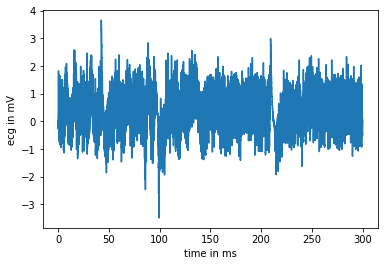

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fs = 360 # Why 360
time = np.arange(ecg.size)/fs
plt.plot(time, ecg)
plt.xlabel('time in ms')
plt.ylabel('ecg in mV')
plt.show()

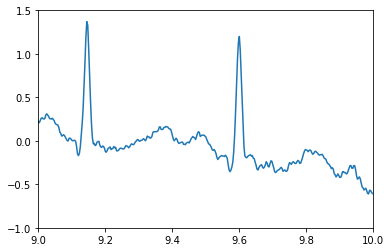

In [5]:
# but this signal does not show us anything and we need to zoom into one arbitrary section of it. 
plt.plot(time, ecg)
plt.xlim(9,10)
plt.ylim(-1,1.5)
plt.show()
#As stated the signal features several areas with a different morphology. 
#E.g., the first few seconds show the electrical activity of a heart in normal sinus rhythm as seen below.

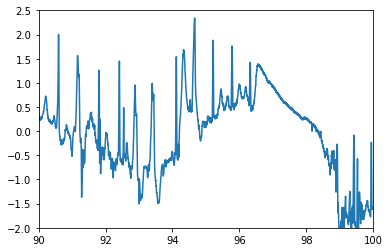

In [6]:
plt.plot(time, ecg)
plt.xlim(90,100)
plt.ylim(-2,2.5)
plt.show()

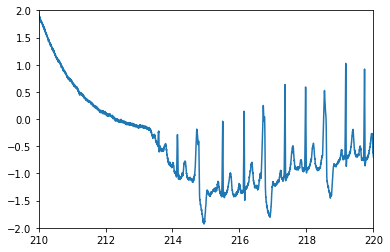

In [7]:
# Here between 210 and 212, noise signal is taking completely over ecg signal.
plt.plot(time,ecg)
plt.xlim(210,220)
plt.ylim(-2,2)
plt.show()

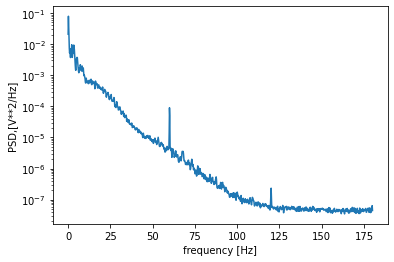

In [10]:
# analyze the power spectral density
from scipy.signal import welch # welch method computes the power spectral density of the signal.
f,pxx = welch(ecg, fs=fs,nperseg=2048,scaling='spectrum')
plt.semilogy(f,pxx) #
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD,[V**2/Hz]')
plt.show()

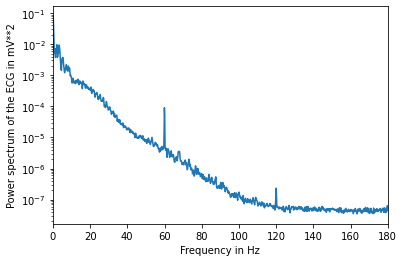